Jasin Mustafi, Hatem Alnasri

# 1

1) a)
$$E_0 = \sqrt[\lambda]{\lambda-1}$$

1) b)

The CDF(E) is $$CDF(E) = 1-E^{1-\lambda}$$

So the inverse CDF(y) is $$CDF(y) = (1-y)^{\frac{1}{1-\lambda}}$$

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import PhyPraKit as ppk

1) c)

In [42]:
# Generate sample that follows power law statistics

np.random.seed(0)
uni = np.random.rand(1000)


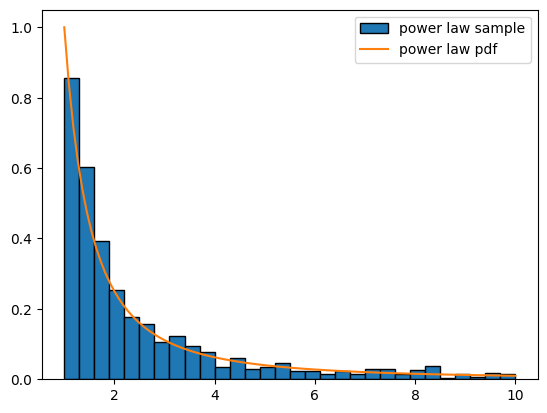

In [43]:
# create and plot sample

sample = 1/(1-uni)
continous = np.linspace(1,10,100)
pdf = continous**(-2)

_ = plt.hist(sample, bins=30, density=True, range=[1,10], edgecolor='black', label='power law sample')
_ = plt.plot(continous, pdf, label='power law pdf')
_ = plt.legend()

1) d)

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_22505/2052954271.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


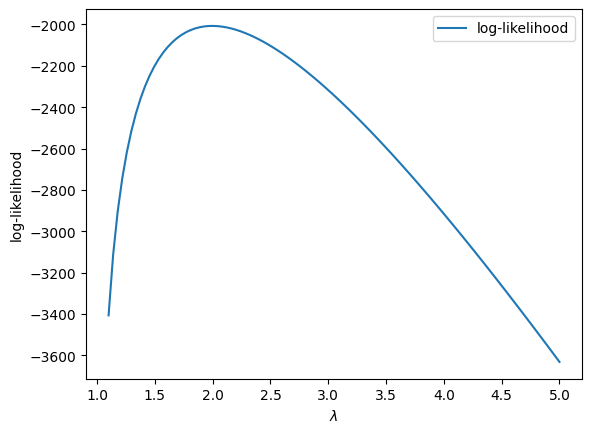

In [44]:
# calculate the likelihood function

def pdf_lambda(E,lamb):
    return E**(-lamb)*(lamb-1)

def log_likelihood(lamb):
    result = 0
    for outcome in sample:
        result += np.log(pdf_lambda(outcome, lamb))

    return result

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    _ = plt.plot(np.linspace(1.1,5,100), log_likelihood(np.linspace(1.1,5,100)), label='log-likelihood')
    plt.xlabel('$\lambda$')
    plt.ylabel('log-likelihood')
    plt.legend()

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_22505/155275446.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')
/tmp/ipykernel_22505/155275446.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.title('maximum likelihood method yields $\lambda$ = 2.006')


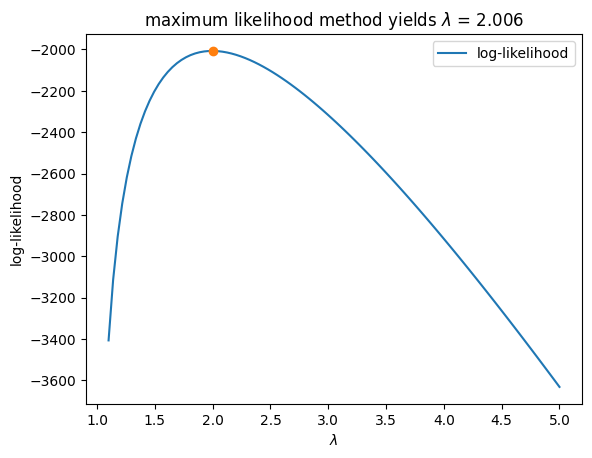

In [59]:
# find the maximum likelihood value

max_index = ppk.convolutionPeakfinder(log_likelihood(np.linspace(1.1,5,100)), 1)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    _ = plt.plot(np.linspace(1.1,5,100), log_likelihood(np.linspace(1.1,5,100)), label='log-likelihood')
    _ = plt.plot(np.linspace(1.1,5,100)[max_index], log_likelihood(np.linspace(1.1,5,100))[max_index], marker='o')
    plt.xlabel('$\lambda$')
    plt.ylabel('log-likelihood')
    plt.title('maximum likelihood method yields $\lambda$ = 2.006')
    plt.legend()

# 2

using natural units to GeV scale

a

In [60]:
# Sample pf p and E measurement

n = 10**4
E_true = 5
m_true = 0.94
E_std = 0.05
p_std = 0.05
p_true = np.sqrt(E_true**2 - m_true**2)

E_measurement = np.random.normal(E_true, E_std, n)
p_measurement = np.random.normal(p_true, p_std, n)
m_measurement = np.sqrt(E_measurement**2 - p_measurement**2)

/tmp/ipykernel_22505/660713320.py:12: RuntimeWarning: invalid value encountered in sqrt
  m_measurement = np.sqrt(E_measurement**2 - p_measurement**2)


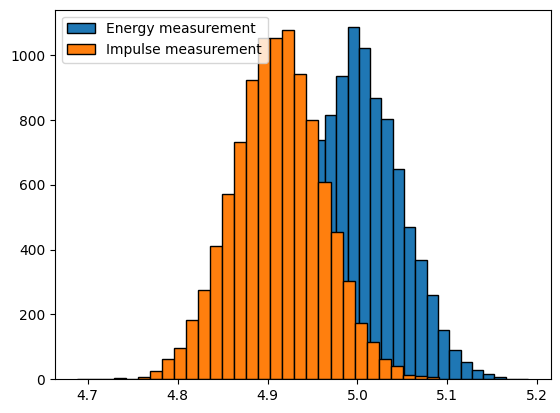

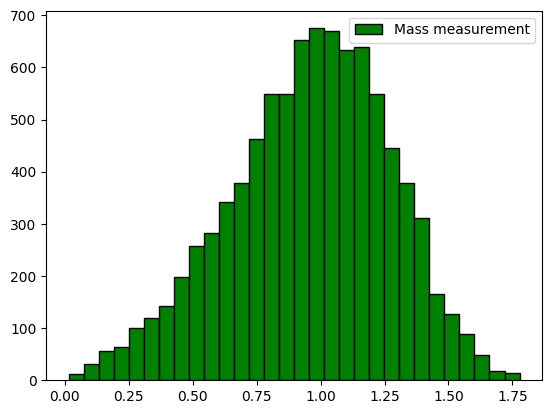

In [79]:
# plot samples

_ = plt.hist(E_measurement, bins=30, edgecolor='black', label='Energy measurement')
_ = plt.hist(p_measurement, bins=30, edgecolor='black', label='Impulse measurement')
plt.legend()
plt.show()
_ = plt.hist(m_measurement, bins=30, edgecolor='black', label='Mass measurement', color='green')
_ = plt.legend()

b

In [80]:
# sample of anti-deterium measurement

Ed_true = 5
md_true = 1.88
Ed_std = 0.05
pd_std = 0.05
pd_true = np.sqrt(Ed_true**2 - md_true**2)

Ed_measurement = np.random.normal(Ed_true, Ed_std, n)
pd_measurement = np.random.normal(pd_true, pd_std, n)
md_measurement = np.sqrt(Ed_measurement**2 - pd_measurement**2)

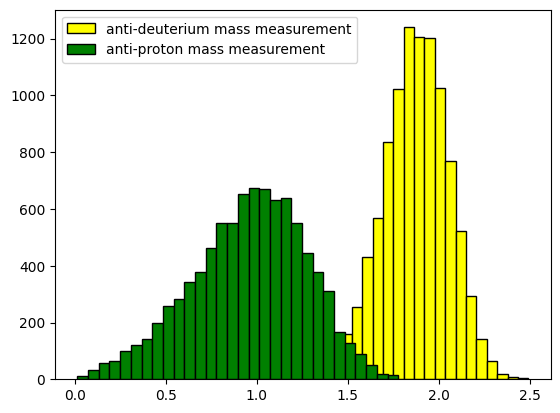

In [98]:
# plotting

counts_per_bin, bin_edges, _ = plt.hist(md_measurement, bins=30, edgecolor='black', label='anti-deuterium mass measurement', color='yellow')
_ = plt.hist(m_measurement, bins=30, edgecolor='black', label='anti-proton mass measurement', color='green')
_ = plt.legend()

Count the number of anti-protons of the last bins:

In [99]:
total_count = 0
bin_no = 30
for count in counts_per_bin[::-1]:
    total_count += count
    print(f'{total_count} from bin {bin_no} to end')
    bin_no -= 1
    if bin_no <= 24:
        print('...')
        break

3.0 from bin 30 to end
12.0 from bin 29 to end
32.0 from bin 28 to end
96.0 from bin 27 to end
239.0 from bin 26 to end
534.0 from bin 25 to end
...


There are around 100 anti-protons (1%) in bins 27 to 30. If we set the critical mass to the left boundary of bin 27, at most 1% of anti-protons will be incorrectly indentified as anti-deuterium.


In [102]:
bin_edges

array([0.78059908, 0.83766028, 0.89472148, 0.95178268, 1.00884388,
       1.06590509, 1.12296629, 1.18002749, 1.23708869, 1.29414989,
       1.35121109, 1.40827229, 1.4653335 , 1.5223947 , 1.5794559 ,
       1.6365171 , 1.6935783 , 1.7506395 , 1.8077007 , 1.86476191,
       1.92182311, 1.97888431, 2.03594551, 2.09300671, 2.15006791,
       2.20712911, 2.26419031, 2.32125152, 2.37831272, 2.43537392,
       2.49243512])

Thus, the critical should be set to 2.2641 GeV.

d

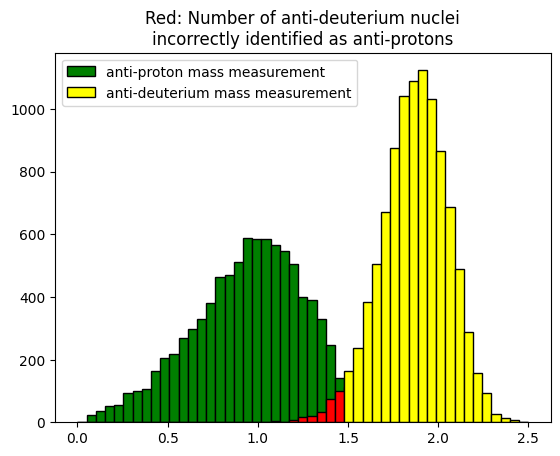

The probability to incorrectly identify anti-deuterium as anti-protons is 2.54%


In [123]:
# plotting

_ = plt.hist(m_measurement, bins=np.linspace(0,2.5,50), edgecolor='black', label='anti-proton mass measurement', color='green')
counts_per_bin, _, patches = plt.hist(md_measurement, bins=np.linspace(0,2.5,50), edgecolor='black', label='anti-deuterium mass measurement', color='yellow')
_ = plt.legend()

total_counts = []
for i in range(len(patches)):
    bin_center = (bin_edges[i] + bin_edges[i+1]) / 2  # Calculate bin center
    if bin_center < 1.5:  # Example condition: center of bin > 0
        patches[i].set_facecolor('red')  # Set bin color
        total_counts.append(counts_per_bin[i])

plt.title('Red: Number of anti-deuterium nuclei\nincorrectly identified as anti-protons')
plt.show()

incorr_detection_percent = np.sum(total_counts)/10**4 * 100
print(f'The probability to incorrectly identify anti-deuterium as anti-protons is {incorr_detection_percent}%')